<a href="https://colab.research.google.com/github/Manideep-0503/RF-drone-detection-using-lstm-model/blob/main/tracking_data_singlevariable_lstm_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('/content/tracking_data.csv')
df

,Time,Angle
0,1.716894e+09,-0.899008
1,1.716894e+09,-1.803182
2,1.716894e+09,-2.730930
3,1.716894e+09,-3.676353
4,1.716894e+09,-4.634019
...,...,...
1431,1.716894e+09,-24.261825
1432,1.716894e+09,-24.130108
1433,1.716894e+09,-23.986863
1434,1.716894e+09,-23.870179


***generating linear sequence of the angle.***

1.   creating samples of 3 timesteps each
2.   each sample contains 3 timesteps of one feauture only.

***X_array and y ***


1.   X_array has consecutive samples [0.12.24],[12,24,36],[24,36,48]....
2.   y has the output [36,48,60,....]



In [6]:
x=np.array(df['Angle'])
x

array([ -0.89900844,  -1.8031817 ,  -2.73092994, ..., -23.9868629 ,
       -23.87017888, -23.74114588])

In [ ]:
x=[i for i in range(0,360,12)]
print(x)

[0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144, 156, 168, 180, 192, 204, 216, 228, 240, 252, 264, 276, 288, 300, 312, 324, 336, 348]


In [8]:
X=[]
for i in range(len(x) - 2):
    sample = x[i:i+3]
    X.append(sample)

X_array = np.array(X)

print(len(X_array))
X_array=X_array.reshape(478,9,1)
print(X_array.shape)
print(X_array)

1434
(478, 9, 1)
[[[ -0.89900844]
  [ -1.8031817 ]
  [ -2.73092994]
  ...
  [ -2.73092994]
  [ -3.67635322]
  [ -4.63401883]]

 [[ -3.67635322]
  [ -4.63401883]
  [ -5.59899574]
  ...
  [ -5.59899574]
  [ -6.56687031]
  [ -7.53374596]]

 [[ -6.56687031]
  [ -7.53374596]
  [ -8.46359029]
  ...
  [ -8.46359029]
  [ -9.38683252]
  [-10.30109292]]

 ...

 [[-24.97637812]
  [-24.84318559]
  [-24.69845566]
  ...
  [-24.69845566]
  [-24.5804586 ]
  [-24.48777984]]

 [[-24.5804586 ]
  [-24.48777984]
  [-24.38130152]
  ...
  [-24.38130152]
  [-24.2618252 ]
  [-24.13010756]]

 [[-24.2618252 ]
  [-24.13010756]
  [-23.9868629 ]
  ...
  [-23.9868629 ]
  [-23.87017888]
  [-23.74114588]]]


In [9]:
y=np.array([X_array[i+1,2,0] for i in range(X_array.shape[0]-1)])
y=np.append(y,y[len(y)-1])
print(y)

[ -5.59899574  -8.46359029 -11.20439274 -13.79759601 -16.04377003
 -18.10008487 -19.97033818 -21.55983054 -22.97603703 -24.28044857
 -25.56270818 -26.70931025 -27.77691905 -28.74018941 -29.6970667
 -30.68814594 -31.66703172 -32.47629945 -33.13732905 -33.71422206
 -34.14471071 -34.44256838 -34.59496962 -34.5808866  -34.4715992
 -34.36175664 -34.36610392 -34.39203675 -34.51198996 -34.67390898
 -34.95557493 -35.29401865 -35.68364253 -36.11995929 -36.63434267
 -37.13304599 -37.49017808 -37.85603847 -38.01370968 -38.21533956
 -38.36195782 -38.37781649 -38.28877262 -38.19048281 -38.04520687
 -37.82168535 -37.53075432 -37.34616704 -37.08619169 -36.72766275
 -36.48508057 -36.42431667 -36.35028653 -36.1842193  -35.90568237
 -35.5687805  -35.14841648 -34.6934573  -34.1349757  -33.56940377
 -33.07044239 -32.55586072 -32.14017522 -31.73213466 -31.29099705
 -30.74990552 -30.16501814 -29.65240728 -29.08859614 -28.44808428
 -27.85664271 -27.29866176 -26.77721927 -26.39084872 -26.18924924
 -25.9282663

In [10]:
split_index=int(len(X_array) * 0.8)

X_train = X_array[:split_index]
X_test = X_array[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

In [11]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[[ -0.89900844]
  [ -1.8031817 ]
  [ -2.73092994]
  ...
  [ -2.73092994]
  [ -3.67635322]
  [ -4.63401883]]

 [[ -3.67635322]
  [ -4.63401883]
  [ -5.59899574]
  ...
  [ -5.59899574]
  [ -6.56687031]
  [ -7.53374596]]

 [[ -6.56687031]
  [ -7.53374596]
  [ -8.46359029]
  ...
  [ -8.46359029]
  [ -9.38683252]
  [-10.30109292]]

 ...

 [[-53.62298049]
  [-53.56720263]
  [-53.48598778]
  ...
  [-53.48598778]
  [-53.38105542]
  [-53.3100182 ]]

 [[-53.38105542]
  [-53.3100182 ]
  [-53.21470702]
  ...
  [-53.21470702]
  [-53.09676447]
  [-53.01311298]]

 [[-53.09676447]
  [-53.01311298]
  [-52.9621931 ]
  ...
  [-52.9621931 ]
  [-52.94254394]
  [-52.95279873]]]
[[[-52.94254394]
  [-52.95279873]
  [-52.93366321]
  [-52.95279873]
  [-52.93366321]
  [-52.88708726]
  [-52.93366321]
  [-52.88708726]
  [-52.81489992]]

 [[-52.88708726]
  [-52.81489992]
  [-52.71881691]
  [-52.81489992]
  [-52.71881691]
  [-52.60044764]
  [-52.71881691]
  [-52.60044764]
  [-52.51608985]]

 [[-52.60044764]
  [-52.

In [ ]:
pip install tensorflow

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [13]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(9, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
history = model.fit(X_train, y_train, epochs=1000, validation_split=0.2, verbose=1)

Epoch 1/1000
10/10 [==============================] - 2s 66ms/step - loss: 184.9834 - val_loss: 385.2210
Epoch 2/1000
10/10 [==============================] - 0s 14ms/step - loss: 20.0973 - val_loss: 21.2585
Epoch 3/1000
10/10 [==============================] - 0s 18ms/step - loss: 2.8432 - val_loss: 17.0376
Epoch 4/1000
10/10 [==============================] - 0s 18ms/step - loss: 1.2053 - val_loss: 1.4384
Epoch 5/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.7603 - val_loss: 4.0997
Epoch 6/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.4752 - val_loss: 1.1610
Epoch 7/1000
10/10 [==============================] - 0s 18ms/step - loss: 0.4185 - val_loss: 1.4725
Epoch 8/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.4077 - val_loss: 0.9341
Epoch 9/1000
10/10 [==============================] - 0s 21ms/step - loss: 0.4043 - val_loss: 2.1577
Epoch 10/1000
10/10 [==============================] - 0s 17ms/step - loss: 0.3982 -

In [16]:
test_predictions = model.predict(X_test).flatten()
print(X_test)
print(test_predictions)
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

3/3 [==============================] - 0s 6ms/step
[[[-52.94254394]
  [-52.95279873]
  [-52.93366321]
  [-52.95279873]
  [-52.93366321]
  [-52.88708726]
  [-52.93366321]
  [-52.88708726]
  [-52.81489992]]

 [[-52.88708726]
  [-52.81489992]
  [-52.71881691]
  [-52.81489992]
  [-52.71881691]
  [-52.60044764]
  [-52.71881691]
  [-52.60044764]
  [-52.51608985]]

 [[-52.60044764]
  [-52.51608985]
  [-52.40880473]
  [-52.51608985]
  [-52.40880473]
  [-52.33492506]
  [-52.40880473]
  [-52.33492506]
  [-52.29292731]]

 [[-52.33492506]
  [-52.29292731]
  [-52.28138373]
  [-52.29292731]
  [-52.28138373]
  [-52.24231336]
  [-52.28138373]
  [-52.24231336]
  [-52.23353711]]

 [[-52.24231336]
  [-52.23353711]
  [-52.19708277]
  [-52.23353711]
  [-52.19708277]
  [-52.13477904]
  [-52.19708277]
  [-52.13477904]
  [-52.04834217]]

 [[-52.13477904]
  [-52.04834217]
  [-51.93938281]
  [-52.04834217]
  [-51.93938281]
  [-51.86362927]
  [-51.93938281]
  [-51.86362927]
  [-51.76476912]]

 [[-51.86362927]
  

,Test Predictions,Actuals
0,-52.952736,-52.718817
1,-52.635460,-52.408805
2,-52.420959,-52.281384
3,-52.372887,-52.197083
4,-52.168755,-51.939383
...,...,...
91,-25.109480,-25.097316
92,-24.710217,-24.698456
93,-24.360943,-24.381302
94,-24.001583,-23.986863


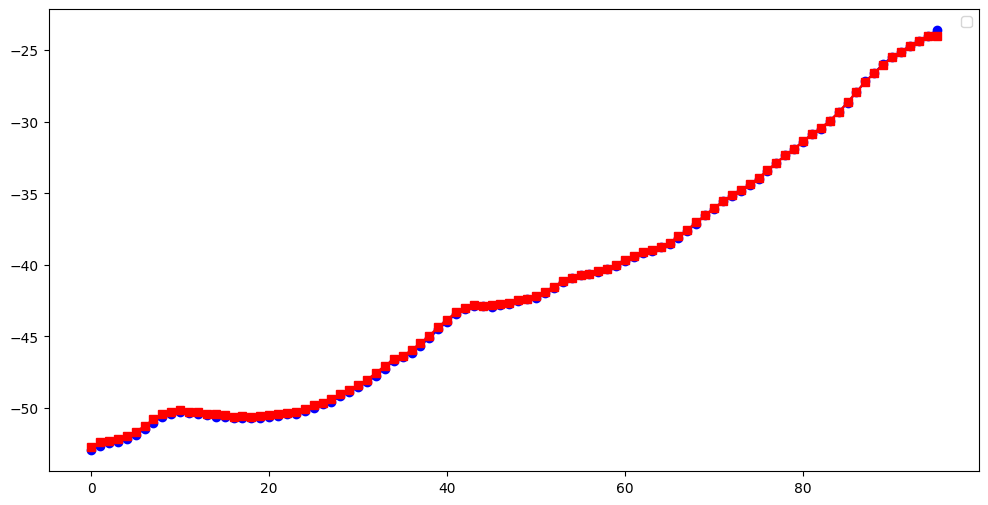

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(test_results['Test Predictions'],color='blue',marker='o')
plt.plot(test_results['Actuals'],color='red',marker='s')
plt.legend()

In [23]:
model1 = Sequential()
model1.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(9, 1)))
model1.add(LSTM(100, activation='relu', return_sequences=True))
model1.add(LSTM(50, activation='relu', return_sequences=True))
model1.add(LSTM(25, activation='relu'))
model1.add(Dense(20, activation='relu'))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 9, 200)            161600    
                                                                 
 lstm_6 (LSTM)               (None, 9, 100)            120400    
                                                                 
 lstm_7 (LSTM)               (None, 9, 50)             30200     
                                                                 
 lstm_8 (LSTM)               (None, 25)                7600      
                                                                 
 dense_4 (Dense)             (None, 20)                520       
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
 dense_6 (Dense)             (None, 1)                

In [24]:
history = model1.fit(X_train, y_train, epochs=1000, validation_split=0.2, verbose=1)

Epoch 1/1000
10/10 [==============================] - 9s 209ms/step - loss: 663.6692 - val_loss: 129.0867
Epoch 2/1000
10/10 [==============================] - 0s 46ms/step - loss: 71.0440 - val_loss: 99.6522
Epoch 3/1000
10/10 [==============================] - 0s 48ms/step - loss: 12.1545 - val_loss: 1.0322
Epoch 4/1000
10/10 [==============================] - 0s 48ms/step - loss: 2.4936 - val_loss: 22.5551
Epoch 5/1000
10/10 [==============================] - 0s 48ms/step - loss: 0.9726 - val_loss: 18.1292
Epoch 6/1000
10/10 [==============================] - 0s 47ms/step - loss: 0.8807 - val_loss: 8.1008
Epoch 7/1000
10/10 [==============================] - 0s 49ms/step - loss: 0.7999 - val_loss: 10.0537
Epoch 8/1000
10/10 [==============================] - 1s 52ms/step - loss: 0.7204 - val_loss: 8.1100
Epoch 9/1000
10/10 [==============================] - 1s 113ms/step - loss: 0.6871 - val_loss: 6.3402
Epoch 10/1000
10/10 [==============================] - 1s 100ms/step - loss: 0.

In [25]:
test_predictions1 = model1.predict(X_test).flatten()
print(X_test)
print(test_predictions1)
test_results1 = pd.DataFrame(data={'Test Predictions':test_predictions1, 'Actuals':y_test})
test_results1

3/3 [==============================] - 1s 15ms/step
[[[-52.94254394]
  [-52.95279873]
  [-52.93366321]
  [-52.95279873]
  [-52.93366321]
  [-52.88708726]
  [-52.93366321]
  [-52.88708726]
  [-52.81489992]]

 [[-52.88708726]
  [-52.81489992]
  [-52.71881691]
  [-52.81489992]
  [-52.71881691]
  [-52.60044764]
  [-52.71881691]
  [-52.60044764]
  [-52.51608985]]

 [[-52.60044764]
  [-52.51608985]
  [-52.40880473]
  [-52.51608985]
  [-52.40880473]
  [-52.33492506]
  [-52.40880473]
  [-52.33492506]
  [-52.29292731]]

 [[-52.33492506]
  [-52.29292731]
  [-52.28138373]
  [-52.29292731]
  [-52.28138373]
  [-52.24231336]
  [-52.28138373]
  [-52.24231336]
  [-52.23353711]]

 [[-52.24231336]
  [-52.23353711]
  [-52.19708277]
  [-52.23353711]
  [-52.19708277]
  [-52.13477904]
  [-52.19708277]
  [-52.13477904]
  [-52.04834217]]

 [[-52.13477904]
  [-52.04834217]
  [-51.93938281]
  [-52.04834217]
  [-51.93938281]
  [-51.86362927]
  [-51.93938281]
  [-51.86362927]
  [-51.76476912]]

 [[-51.86362927]
 

,Test Predictions,Actuals
0,-53.205975,-52.718817
1,-52.984451,-52.408805
2,-52.699039,-52.281384
3,-52.551037,-52.197083
4,-52.436642,-51.939383
...,...,...
91,-24.905746,-25.097316
92,-24.506554,-24.698456
93,-24.126835,-24.381302
94,-23.806889,-23.986863


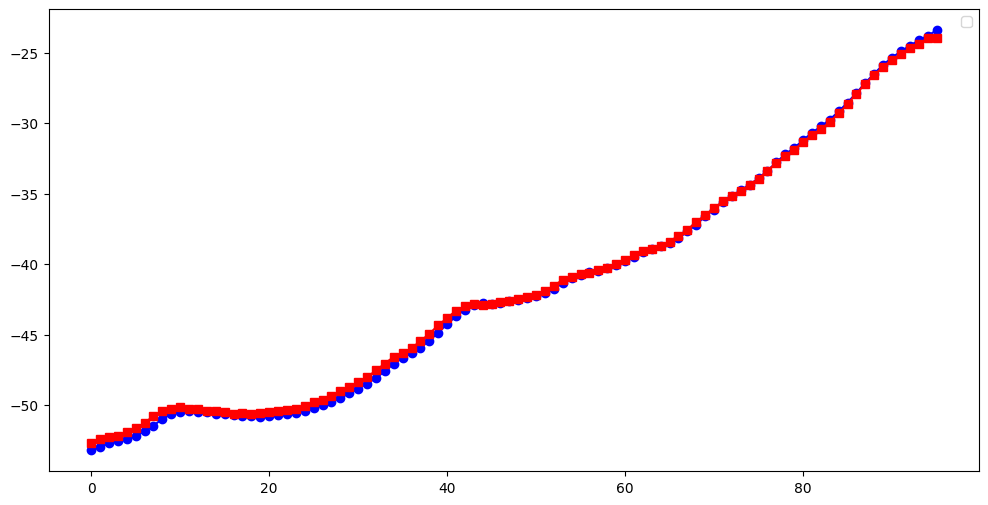

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(test_results1['Test Predictions'],color='blue',marker='o')
plt.plot(test_results1['Actuals'],color='red',marker='s')
plt.legend()

In [27]:
from keras.layers import Bidirectional

model2 = Sequential()
model2.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(9, 1)))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 100)               20800     
 al)                                                             
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20901 (81.64 KB)
Trainable params: 20901 (81.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
history = model2.fit(X_train, y_train, epochs=1000, validation_split=0.2, verbose=1)

Epoch 1/1000
10/10 [==============================] - 4s 89ms/step - loss: 900.2759 - val_loss: 1389.5243
Epoch 2/1000
10/10 [==============================] - 0s 21ms/step - loss: 120.7165 - val_loss: 170.4058
Epoch 3/1000
10/10 [==============================] - 0s 21ms/step - loss: 18.7764 - val_loss: 30.8430
Epoch 4/1000
10/10 [==============================] - 0s 22ms/step - loss: 2.7523 - val_loss: 14.8692
Epoch 5/1000
10/10 [==============================] - 0s 24ms/step - loss: 1.5635 - val_loss: 4.6921
Epoch 6/1000
10/10 [==============================] - 0s 27ms/step - loss: 0.6309 - val_loss: 7.2375
Epoch 7/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.4443 - val_loss: 2.0643
Epoch 8/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.4313 - val_loss: 3.9905
Epoch 9/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.4052 - val_loss: 2.4926
Epoch 10/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.3

In [29]:
test_predictions2 = model2.predict(X_test).flatten()
print(X_test)
print(test_predictions2)
test_results2 = pd.DataFrame(data={'Test Predictions':test_predictions2, 'Actuals':y_test})
test_results2

3/3 [==============================] - 0s 6ms/step
[[[-52.94254394]
  [-52.95279873]
  [-52.93366321]
  [-52.95279873]
  [-52.93366321]
  [-52.88708726]
  [-52.93366321]
  [-52.88708726]
  [-52.81489992]]

 [[-52.88708726]
  [-52.81489992]
  [-52.71881691]
  [-52.81489992]
  [-52.71881691]
  [-52.60044764]
  [-52.71881691]
  [-52.60044764]
  [-52.51608985]]

 [[-52.60044764]
  [-52.51608985]
  [-52.40880473]
  [-52.51608985]
  [-52.40880473]
  [-52.33492506]
  [-52.40880473]
  [-52.33492506]
  [-52.29292731]]

 [[-52.33492506]
  [-52.29292731]
  [-52.28138373]
  [-52.29292731]
  [-52.28138373]
  [-52.24231336]
  [-52.28138373]
  [-52.24231336]
  [-52.23353711]]

 [[-52.24231336]
  [-52.23353711]
  [-52.19708277]
  [-52.23353711]
  [-52.19708277]
  [-52.13477904]
  [-52.19708277]
  [-52.13477904]
  [-52.04834217]]

 [[-52.13477904]
  [-52.04834217]
  [-51.93938281]
  [-52.04834217]
  [-51.93938281]
  [-51.86362927]
  [-51.93938281]
  [-51.86362927]
  [-51.76476912]]

 [[-51.86362927]
  

,Test Predictions,Actuals
0,-52.738289,-52.718817
1,-52.405334,-52.408805
2,-52.191345,-52.281384
3,-52.163177,-52.197083
4,-51.955761,-51.939383
...,...,...
91,-25.071489,-25.097316
92,-24.682383,-24.698456
93,-24.334845,-24.381302
94,-23.991714,-23.986863


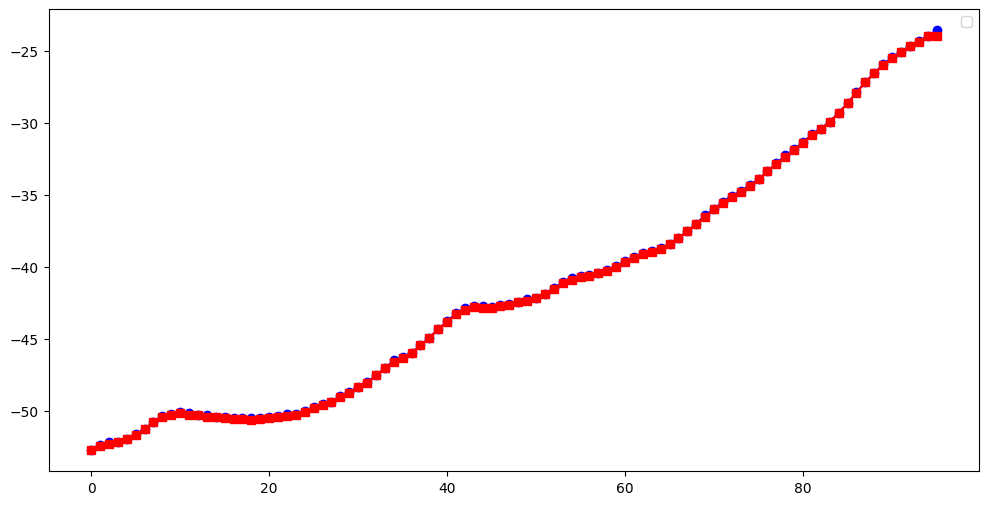

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(test_results2['Test Predictions'],color='blue',marker='o')
plt.plot(test_results2['Actuals'],color='red',marker='s')
plt.legend()